
# Project: Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#visuals">Data Visualisation</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> * The data set I have selected is Medical Appointment No shows. <br>
> * The data set variables are self explanatory. The variables in the data set are 'Patient ID', 'AppointmentID', 'Gender', 'ScheduleDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-Show'. <br>
> * In this data set No-Show feature can be taken as dependent variable and the rest of the variables can be taken as independent variables which affect the status of No-Show.<br>
> * No-Show as Yes corresponds to people who did not turn up for the doctor visit and No-Show as No turned up for the doctor visit.

> ### The questions I will try to answer by analysing the dataset are:
* Are notifications from the authorities helping people to visit the doctor on scheduled time?
* Is there any difference in gender in having a patient to be with status Show/ No-Show?
* How does the age of the patient affect the status Show/No-Show?
* On which day maximum appointments are getting finalized with Show Status?
* Is the scholarship helping people to show up for the doctor visit?
* Which regions have high count of appointments with the doctor?

### Steps I will be following are:
1. Load the data
2. Variable Identification.
3. Check for cleanliness.
4. Trim and clean the data.
5. Feature Selection.
6. Modification of features if needed.
7. EDA with visualisations.

In [184]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### Loading the data

In [185]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("no-show_appointments.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [186]:
# Creating a summary of the data.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Minimum age in the dataset is negative(something to be taken care of) and max age is above 100.

### Variable Identification
* Identifying the target variable(dependent variable) and the predictor variables(independent variables) which affect the status of the target variable.

In [187]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

* In this analysis, I am considering No-Show as the target variable and the rest as the predictor variables.
* Not every feature affects the No-Show status. Features such as IDs can be excluded.

### Type of Variable Classified:
#### Predictor Variables:
1. Gender
2. ScheduledDay
3. AppointmentDay
4. Age
5. Neighbourhood
6. Scholarship
7. Hipertension
8. Diabetes
9. Alcoholism
10. Handcap
11. SMS_received
<br>

#### Target Variable (Independent Variable)
1. No-show

In [188]:
# Checking the data types of each column (features)
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

### Data Types

#### Strings:
Gender, ScheduledDay, AppointmentDay, Neighbourhood, No-show.

#### Numeric:
Age, Scholarship, Hipertension, Diabetes, Alcoholism, Handcao, SMS_received.

### Variable Category
#### Categorical:
Gender, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show

#### Checking for missing data

In [189]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

* There are no missing values in the dataset. One of the major problems to be accessed is not needed.

In [190]:
# Looking how the data is structured overall
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Checking for counts of some categorical variables.

In [191]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

Majority of the people did not turn up for the appointment.

In [192]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

The female proportion is more than that of the male proportion in the dataset.

In [193]:
# Checking for scheduled days and appointment days.
# Do they match?
df[['ScheduledDay','AppointmentDay']].head()

,ScheduledDay,AppointmentDay
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z
1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z
2,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z
3,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z
4,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z


* The Scheduled and Appointment days are in date time format. 
* To deal with this type of data I have referrred the following documentation:
https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html

<a id='cleaning'></a>
## Data Cleaning

#### The changes made to date format.
* The date time format has been converted to Date, Week day and Month Scheduled.
* Days, Month are as normal count in integer.
* The Week day is coded as Monday : 0 to Sunday : 6
* As the dataset is of year 2016, the year can be ignored.
* This is done using NumPy's datetime64

In [194]:
df['ScheduledDay'] = df['ScheduledDay'].apply(np.datetime64)
df['Day_Scheduled'] = df['ScheduledDay'].dt.day
df['Weekday_Scheduled'] = df['ScheduledDay'].dt.dayofweek
df['Month_Scheduled'] = df['ScheduledDay'].dt.month

df['AppointmentDay'] = df['AppointmentDay'].apply(np.datetime64)
df['Day_appointed'] = df['AppointmentDay'].dt.day
df['Weekday_appointed'] = df['AppointmentDay'].dt.dayofweek
df['Month_appointed'] = df['AppointmentDay'].dt.month

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Day_Scheduled,Weekday_Scheduled,Month_Scheduled,Day_appointed,Weekday_appointed,Month_appointed
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,29,4,4,29,4,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,29,4,4,29,4,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,29,4,4,29,4,4
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,29,4,4,29,4,4
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,29,4,4,29,4,4


In [195]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'Day_Scheduled', 'Weekday_Scheduled', 'Month_Scheduled',
       'Day_appointed', 'Weekday_appointed', 'Month_appointed'],
      dtype='object')

In [196]:
df['Month_appointed'].nunique()

3

In [197]:
df['Weekday_appointed'].nunique()

6

In [198]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'Day_Scheduled', 'Weekday_Scheduled', 'Month_Scheduled',
       'Day_appointed', 'Weekday_appointed', 'Month_appointed'],
      dtype='object')

* Some of the spellings of the columns are incorrect.
* Correcting them will make it easier for the users to follow.

In [199]:
df.rename(columns = {'Hipertension':'Hypertension','Handcap':'Handicap'}, inplace =True)

In [200]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show',
       'Day_Scheduled', 'Weekday_Scheduled', 'Month_Scheduled',
       'Day_appointed', 'Weekday_appointed', 'Month_appointed'],
      dtype='object')

### Checking the unique values for each column.

In [201]:
df.Gender.unique()

array(['F', 'M'], dtype=object)

In [202]:
np.sort(df.Age.unique())

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115],
      dtype=int64)

* A negative value of the age exists.
* This has to be removed.

In [203]:
df.Neighbourhood.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [204]:
df.Scholarship.unique()

array([0, 1], dtype=int64)

In [205]:
df.Hypertension.unique()

array([1, 0], dtype=int64)

In [206]:
df.Diabetes.unique()

array([0, 1], dtype=int64)

In [207]:
df.Alcoholism.unique()

array([0, 1], dtype=int64)

In [208]:
df.Handicap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [209]:
df.SMS_received.unique()

array([0, 1], dtype=int64)

In [210]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

#### Dealing with the inappropriate age values

* The people in the age of < 0 are unrealistic and with age of > 100 are rare in reality.
* These age groups can be cleaned from the data for better analysis.

In [211]:
# Checking for number of people in this range of values.
df.query('Age <0 | Age > 100')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Day_Scheduled,Weekday_Scheduled,Month_Scheduled,Day_appointed,Weekday_appointed,Month_appointed
58014,9.762948e+14,5651757,F,2016-05-03 09:14:53,2016-05-03,102,CONQUISTA,0,0,0,0,0,0,No,3,1,5,3,1,5
63912,3.196321e+13,5700278,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes,16,0,5,19,3,5
63915,3.196321e+13,5700279,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes,16,0,5,19,3,5
68127,3.196321e+13,5562812,F,2016-04-08 14:29:17,2016-05-16,115,ANDORINHAS,0,0,0,0,1,0,Yes,8,4,4,16,0,5
76284,3.196321e+13,5744037,F,2016-05-30 09:44:51,2016-05-30,115,ANDORINHAS,0,0,0,0,1,0,No,30,0,5,30,0,5
90372,2.342836e+11,5751563,F,2016-05-31 10:19:49,2016-06-02,102,MARIA ORTIZ,0,0,0,0,0,0,No,31,1,5,2,3,6
97666,7.482346e+14,5717451,F,2016-05-19 07:57:56,2016-06-03,115,SÃO JOSÉ,0,1,0,0,0,1,No,19,3,5,3,4,6
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No,6,0,6,6,0,6


8 patient records have Age<0 or Age>100. Hence considering these patients as outliers and removing them will give us better analysis.

In [212]:
df.drop(df[(df.Age < 0) | (df.Age > 100)].index, inplace = True)

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   PatientId          110519 non-null  float64       
 1   AppointmentID      110519 non-null  int64         
 2   Gender             110519 non-null  object        
 3   ScheduledDay       110519 non-null  datetime64[ns]
 4   AppointmentDay     110519 non-null  datetime64[ns]
 5   Age                110519 non-null  int64         
 6   Neighbourhood      110519 non-null  object        
 7   Scholarship        110519 non-null  int64         
 8   Hypertension       110519 non-null  int64         
 9   Diabetes           110519 non-null  int64         
 10  Alcoholism         110519 non-null  int64         
 11  Handicap           110519 non-null  int64         
 12  SMS_received       110519 non-null  int64         
 13  No-show            110519 non-null  object  

In [214]:
# Checking for patients with unique ID
df.PatientId.nunique()

62294

In [215]:
df.PatientId.duplicated().sum()

48225

* There are 62294 patients with unique IDs.
* Dropping the Duplicates will not help much because patients can go for re-check up multiple time which is still a new record for the same patient.

<a id='visuals'></a>
## Data Visualisation

* Visualising the number proportion of No-Show as Yes or No.

In [216]:
df['No-show'].value_counts()

No     88203
Yes    22316
Name: No-show, dtype: int64

In [217]:
#Normalize to get the proportion.
df['No-show'].value_counts(normalize=True)

No     0.79808
Yes    0.20192
Name: No-show, dtype: float64

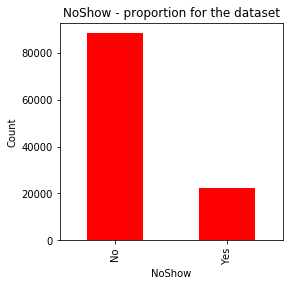

In [218]:
df['No-show'].value_counts().plot.bar(figsize = (4,4), title = 'NoShow - proportion for the dataset', color = 'r')
plt.xlabel('NoShow')
plt.ylabel('Count');

* Similarly Plotting for some of the other columns

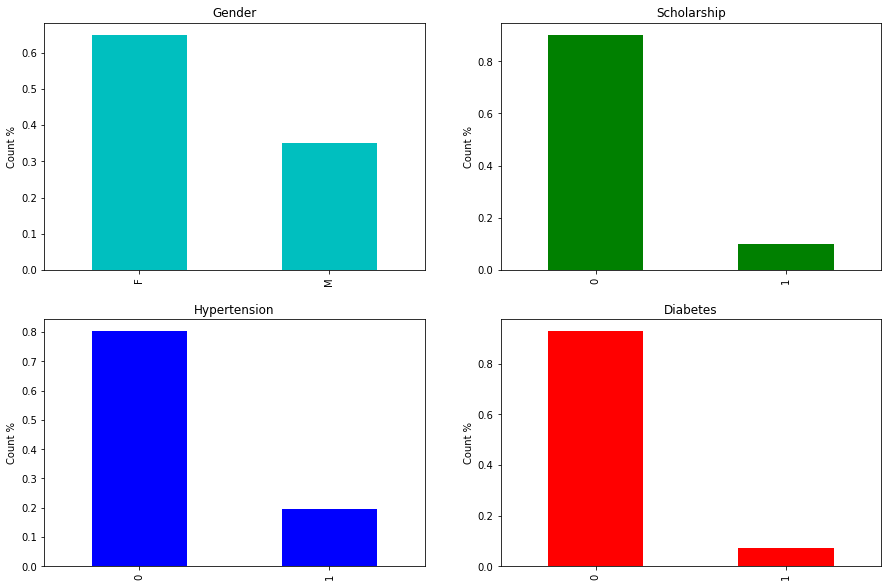

In [219]:
plt.figure(1)
cols = ['Gender', 'Scholarship', 'Hypertension', 'Diabetes']
clr = ['c', 'g', 'b', 'r']
i=0
for col in cols:
    plt.subplot(int(str(22)+str((cols.index(col)+1))))
    df[col].value_counts(normalize=True).plot.bar(figsize=(15,10),color=clr[i])
    plt.title(col)
    plt.ylabel('Count %')
    i+=1

From the above plots it can be inferred that:

* Around 65% patient instances are with female records
* Around 85% of the these instances are not having scholarship.
* Around 20% of patient instances have Hypertension.
* Around 88% of patient instacnes do not have diabetes

### Feature Selection

In [220]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show',
       'Day_Scheduled', 'Weekday_Scheduled', 'Month_Scheduled',
       'Day_appointed', 'Weekday_appointed', 'Month_appointed'],
      dtype='object')

###### The columns mentioned below are unnecessary as they don't contribute in the prediction of the No-Show.

1. PatientId
2. AppointmentID
3. ScheduledDay
4. AppointmentDay

In [221]:
# dropping the above mentioned columns
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis = 1, inplace = True)

In [222]:
df.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show',
       'Day_Scheduled', 'Weekday_Scheduled', 'Month_Scheduled',
       'Day_appointed', 'Weekday_appointed', 'Month_appointed'],
      dtype='object')

In [223]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Day_Scheduled,Weekday_Scheduled,Month_Scheduled,Day_appointed,Weekday_appointed,Month_appointed
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,29,4,4,29,4,4
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,29,4,4,29,4,4
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,29,4,4,29,4,4
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,29,4,4,29,4,4
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,29,4,4,29,4,4


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Gender             110519 non-null  object
 1   Age                110519 non-null  int64 
 2   Neighbourhood      110519 non-null  object
 3   Scholarship        110519 non-null  int64 
 4   Hypertension       110519 non-null  int64 
 5   Diabetes           110519 non-null  int64 
 6   Alcoholism         110519 non-null  int64 
 7   Handicap           110519 non-null  int64 
 8   SMS_received       110519 non-null  int64 
 9   No-show            110519 non-null  object
 10  Day_Scheduled      110519 non-null  int64 
 11  Weekday_Scheduled  110519 non-null  int64 
 12  Month_Scheduled    110519 non-null  int64 
 13  Day_appointed      110519 non-null  int64 
 14  Weekday_appointed  110519 non-null  int64 
 15  Month_appointed    110519 non-null  int64 
dtypes: int64(13), object

#### The data is now cleaned and ready to use for answering the research questions.
<br>
<br>

<a id='eda'></a>
# Exploratory Data Analysis

> Now the questions can be answered as the data is cleaned and ready to analyse

### 1. Are notifications from the authorities helping people to visit the doctor on scheduled time?

#### Analysing the SMS_received column vs No-Show

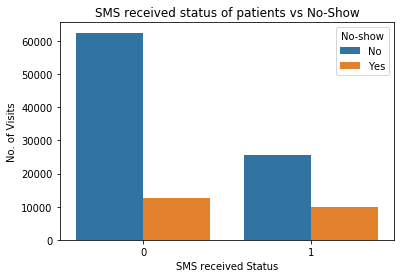

In [225]:
SMS_recieved = sns.countplot(x = 'SMS_received', hue = 'No-show', data = df)
SMS_recieved.set_title('SMS received status of patients vs No-Show')
plt.xlabel('SMS received Status')
plt.ylabel('No. of Visits')
plt.show()

* It can be inferred that around 25k patients who received the SMS have turned up for the doctor visit.

### 2. Is there any difference in gender in having a patient to be with status Show/ No-Show?

In [226]:
df1=df.groupby('Gender')['No-show'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
df1

,Gender,No-show,percent
0,F,No,79.687326
1,F,Yes,20.312674
2,M,No,80.032052
3,M,Yes,19.967948


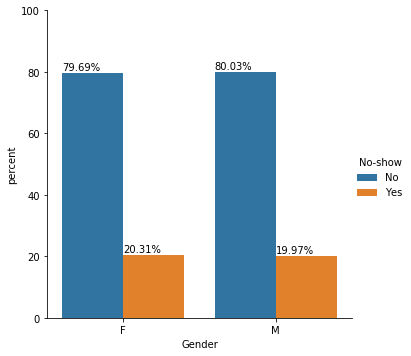

In [227]:
g = sns.catplot(x='Gender',y='percent',hue='No-show',kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height() + 1
    g.ax.text(txt_x,txt_y,txt)

* It can be inferred that there is no significant difference with Gender in having the status with Show / No-Show.

### 3. How does the age of the patient affect the status Show/No-Show?

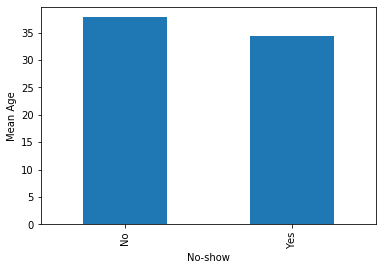

In [228]:
df.groupby('No-show')['Age'].mean().plot.bar()
plt.ylabel('Mean Age');

* Most of the people with "No-show" = "Yes" have age lesser than that of mean age.

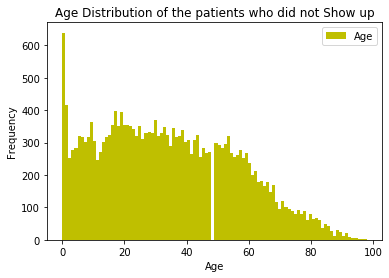

In [229]:
# Plotting Age vs no. of people with No-Show = Yes
df_noshow = df[df['No-show'] == "Yes"]
df_noshow.plot(kind = 'hist', y= 'Age', bins = 100, color = 'y')
plt.title('Age Distribution of the patients who did not Show up')
plt.xlabel('Age');

* Of those patients who did not show up for appointment, majority patients with age group from 20 to 40 did not show up for the appointment when compared to age groups 0-20, 40-60 and 60 plus

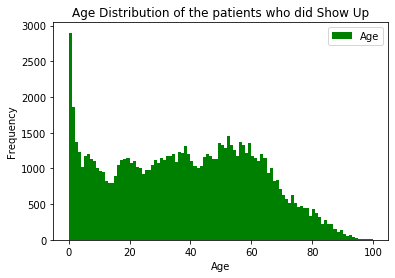

In [230]:
# Plotting Age vs no. of people with No-Show = Yes
df_Show = df[df['No-show'] == "No"]
df_Show.plot(kind = "hist",y = "Age",bins = 100, color = 'g') 
plt.title('Age Distribution of the patients who did Show Up')
plt.xlabel('Age')
plt.show()

* Of the patients who have showed up for appointment, it seems that age group from 40 to 60 have really showed interest in appointment when compared to age groups of 0-20, 20-40 and 60 plus.

### 4. On which day / weekday / month maximum appointments are getting finalized with Show Status?

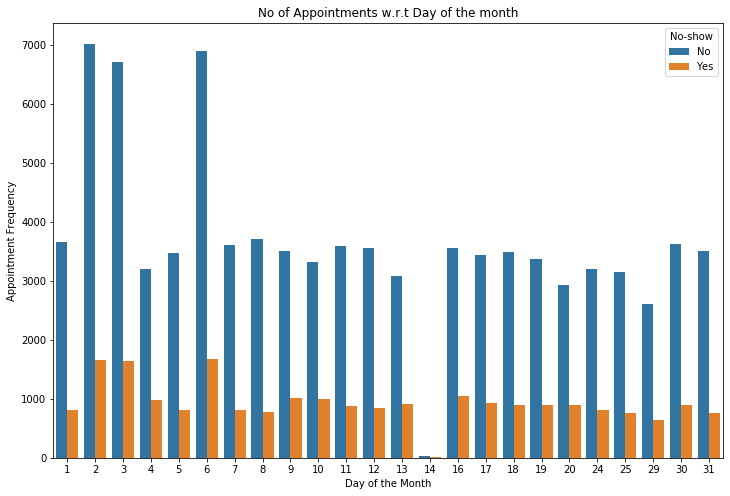

In [231]:
plt.figure(figsize = (12,8))
app_day = sns.countplot(x = 'Day_appointed', hue = 'No-show', data = df)
app_day.set_title('No of Appointments w.r.t Day of the month')
plt.xlabel('Day of the Month')
plt.ylabel('Appointment Frequency')
plt.show()

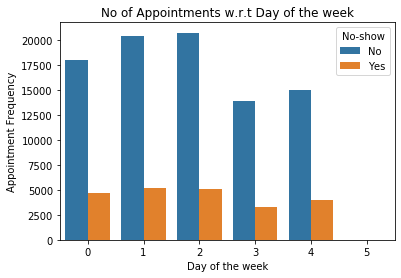

In [232]:
app_weekday = sns.countplot(x = 'Weekday_appointed', hue = 'No-show', data = df)
app_weekday.set_title('No of Appointments w.r.t Day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Appointment Frequency')
plt.show()
# Monday = 0 and Sunday =6

* Majority of the visits or appointments happend and people showed up on the weeekdays (Monday, Tuesday and Wednesday) when compared to weekends.

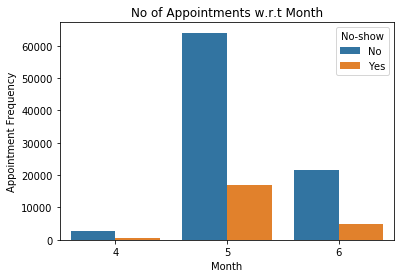

In [233]:
app_month = sns.countplot(x = 'Month_appointed', hue = 'No-show', data = df)
app_month.set_title('No of Appointments w.r.t Month')
plt.xlabel('Month')
plt.ylabel('Appointment Frequency')
plt.show()

* Majority of the appointments happend in the month of May

### 5. Is the scholarship helping people to show up for the doctor visit?

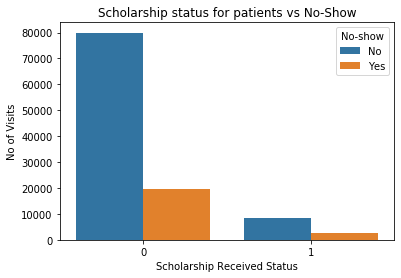

In [234]:
Scholarship = sns.countplot(x = 'Scholarship', hue = 'No-show', data = df)
Scholarship.set_title('Scholarship status for patients vs No-Show')
plt.xlabel('Scholarship Received Status')
plt.ylabel('No of Visits')
plt.show()

In [235]:
# Calculating the percentage group wise
df2=df.groupby('Scholarship')['No-show'].value_counts(normalize=True)
df2 = df2.mul(100)
df2 = df2.rename('percent').reset_index()
df2

,Scholarship,No-show,percent
0,0,No,80.194264
1,0,Yes,19.805736
2,1,No,76.263696
3,1,Yes,23.736304


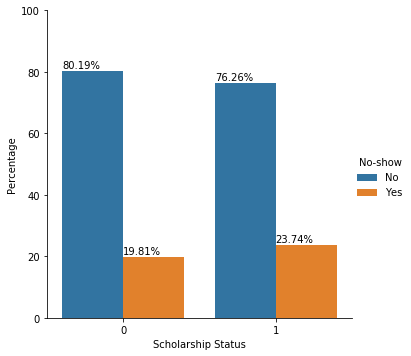

In [236]:
g = sns.catplot(x='Scholarship',y='percent',hue='No-show',kind='bar',data=df2)
g.ax.set_ylim(0,100)
plt.xlabel('Scholarship Status')
plt.ylabel('Percentage')
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height() + 1
    g.ax.text(txt_x,txt_y,txt)

* Among the people who received scholarship, arounf 25% of them did not turn up for the doctor visit.

### 6. Which regions have high count of appointments with the doctor?

In [237]:
# Considering top 10 neighbourhoods with higher counts
region = df['Neighbourhood'].value_counts().head(10)
region

JARDIM CAMBURI       7717
MARIA ORTIZ          5804
RESISTÊNCIA          4431
JARDIM DA PENHA      3877
ITARARÉ              3514
CENTRO               3334
TABUAZEIRO           3132
SANTA MARTHA         3131
JESUS DE NAZARETH    2853
BONFIM               2773
Name: Neighbourhood, dtype: int64

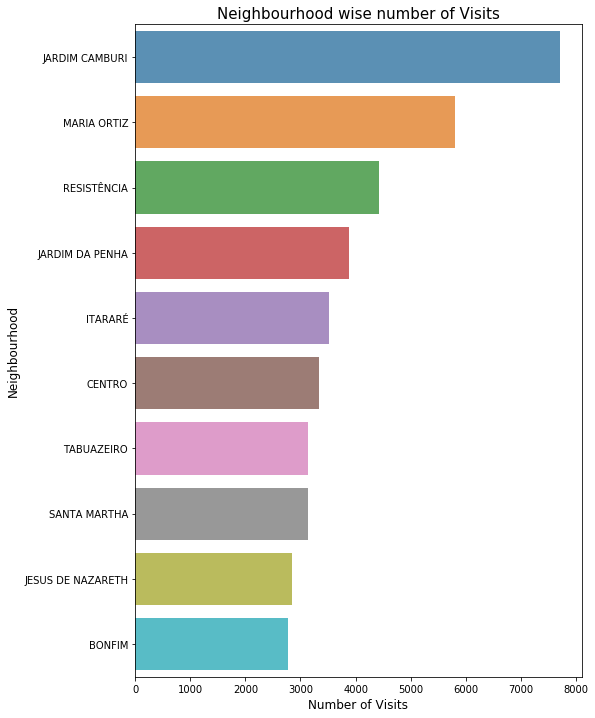

In [238]:
plt.figure(figsize=(8,12))
sns.barplot(y=region.index, x=region.values, alpha=0.8)
plt.xlabel('Number of Visits', fontsize=12)
plt.ylabel('Neighbourhood', fontsize=12)
plt.title("Neighbourhood wise number of Visits", fontsize=15)
plt.show()

* Number of visits are more in the neighbourhood of Jardim Camburi

<br>

<a id='conclusions'></a>
## Conclusions

1. It can be concluded that around 25k patients who received the SMS have turned up for the doctor visit.
2. It can be concluded that there is no significant difference with Gender in having the status with Show / No-Show.
3. Of those patients who did not show up for appointment, majority patients with age group from 20 to 40 did not show up for the appointment when compared to age groups 0-20, 40-60 and 60 +.
4. Of the patients who have showed up for appointment, it seems that age group from 40 to 60 have really showed interest in appointment when compared to age groups of 0-20, 20-40 and 60 +.
5. It can be concluded that majority of the appointments happend in the month of May.
6. It can be concluded that number of visits are more in the neighbourhood of Jardim Camburi.

## References
1. https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html 
2. https://seaborn.pydata.org/generated/seaborn.countplot.html
3. https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group
